In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

class Expert:
    def __init__(self,
                 loss=[0,1]):
        '''
        Since we're not working with any data in particular,
        our experts will be dummies that return a value taken uniformly from its
        loss range.
        '''
        self.loss = loss
    def get_loss(self):
        '''
        Returns a value form the uniform distibution over loss
        '''
        low = self.loss[0]
        high = self.loss[1]
        return np.random.uniform(low, high)
class EG:
    def __init__(self,
                experts=[]):
        '''
        '''
        self.experts = experts

    def _get_losses(self, T=1):
        k = len(self.experts)
        losses = np.empty(shape=(T,k))
        for i in range(T):
            for j in range(k):
                losses[i,j] = self.experts[j].get_loss()
        return losses
    def add_experts(self, experts):
        '''
        experts should be a list of experts
        '''
        self.experts = self.experts + experts

    def add_expert(self, expert):
        '''
        expert should be a single Expert object
        '''
        self.experts.append(expert)

    def fire_experts():
        '''
        Clears all experts from EG
        '''
        self.experts = []

    def get_advice(self, rounds = 1):
        eta = np.sqrt(2/rounds)
        k = len(self.experts)
        # loss is our loss from a given set of trials.
        loss = []
        # losses is the losses from each expert on each round.
        losses = self._get_losses(T=rounds)
        x = np.full(k, fill_value=1/k)
        # Since in this case our experts are going to be static
        # We can get all the losses for T rounds at once then run the algorithm.
        for t in range(rounds):
            expert_id = np.random.choice(a=k,p=x)
            loss.append(losses[t][expert_id])
            l = [] 
            for j in range(k):
                l.append(x[j]*np.exp(-eta*losses[t][j]))
            for j in range(k):
                x[j] = l[j]/sum(l)
        return (x, loss, losses)
            

<AxesSubplot:>

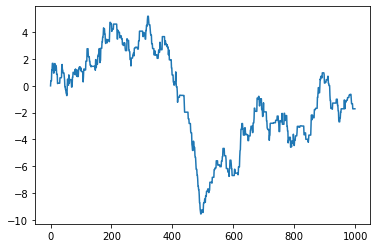

In [2]:
e_1 = Expert()
e_2 = Expert()
model = EG(experts = [e_1, e_2])
T = 1000
data = model.get_advice(rounds = T)
l = np.sum(data[2], axis=0)
if l[0] < l[1]:
    e = 0
else:
    e = 1
sns.lineplot(x=range(T), y=np.cumsum(data[1]-data[2][:,e]))

<AxesSubplot:>

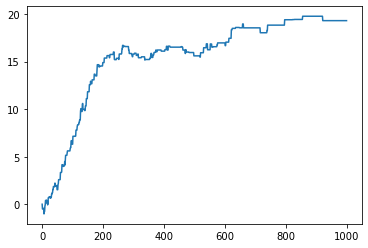

In [3]:
e_1 = Expert(loss=[0,0.8])
e_2 = Expert()
model = EG(experts = [e_1, e_2])
T = 1000
data = model.get_advice(rounds = T)
l = np.sum(data[2], axis=0)
if l[0] < l[1]:
    e = 0
else:
    e = 1
sns.lineplot(x=range(T), y=np.cumsum(data[1]-data[2][:,e]))

In [4]:
class FTRL:
    def __init__(self,
                experts=[]):
        '''
        '''
        self.experts = experts

    def _get_losses(self, T=1):
        k = len(self.experts)
        losses = np.empty(shape=(T,k))
        for i in range(T):
            for j in range(k):
                losses[i,j] = self.experts[j].get_loss()
        return losses
    def add_experts(self, experts):
        '''
        experts should be a list of experts
        '''
        self.experts = self.experts + experts

    def add_expert(self, expert):
        '''
        expert should be a single Expert object
        '''
        self.experts.append(expert)

    def fire_experts():
        '''
        Clears all experts from EG
        '''
        self.experts = []

    def get_advice(self, rounds = 1):
        k = len(self.experts)
        # loss is our loss from a given set of trials.
        loss = []
        # losses is the losses from each expert on each round.
        losses = self._get_losses(T=rounds)
        g_l=np.cumsum(losses, axis=0)
        x = np.full(k, fill_value=1/k)
        # Since in this case our experts are going to be static
        # We can get all the losses for T rounds at once then run the algorithm.
        for t in range(rounds):
            expert_id = np.random.choice(a=k,p=x)
            loss.append(losses[t][expert_id])
            l = []
            for j in range(k):
                l.append(np.exp(-(np.sqrt(np.log(k))/np.sqrt(t+1))*g_l[t,j]))
            for j in range(k):
                x[j] = l[j]/np.sum(l)
        return (x, loss, losses)

<AxesSubplot:>

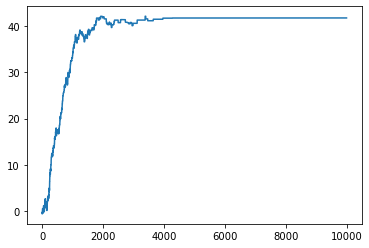

In [5]:
e_1 = Expert(loss=[0,0.8])
e_2 = Expert()
model = EG(experts = [e_1, e_2])
T = 10000
data = model.get_advice(rounds = T)
l = np.sum(data[2], axis=0)
if l[0] < l[1]:
    e = 0
else:
    e = 1
sns.lineplot(x=range(T), y=np.cumsum(data[1]-data[2][:,e]))

<AxesSubplot:>

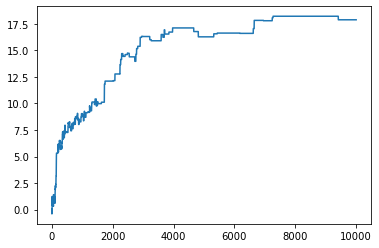

In [6]:
e_1 = Expert(loss=[0,0.8])
e_2 = Expert()
model = FTRL(experts = [e_1, e_2])
T = 10000
data = model.get_advice(rounds = T)
l = np.sum(data[2], axis=0)
if l[0] < l[1]:
    e = 0
else:
    e = 1
sns.lineplot(x=range(T), y=np.cumsum(data[1]-data[2][:,e]))